<a id="top"></a> <h1>Investigating the Prosper Loan Dataset</h1>

<ul>
    <li><a href="#datacleaning">Data Cleaning </a> </li>
    <li><a href="#EDA">Exploratory Data Analysis </a> </li>
    <ul>
        <li><a href="#univariate">Univariate Exploration </a> </li>
        <li><a href="#bivariate">Bivariate Exploration </a> </li>
        <li><a href="#multivariate">Multivariate Exploration </a> </li>
    </ul>
</ul>

<a id="datacleaning"> </a>
## Data Cleaning

In [1]:
# Import all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
# Load in the dataset
prosper_all = pd.read_csv('prosperLoanData.csv')

### What is the structure of your dataset?

The dataset involves 113,937 loans made using the Prosper service. There are 81 
variables in total, for various loan attributes such as *Term* and *BorrowerRate*, and various borrower attributes such as *Occupation* and *ListingCategory*.

### The dataset is too large, what features are you going to focus on?

Upon investigating the various variables used in the dataset, we've decided to work with the following variables:

##### ID
<ul>
    <li><b>ListingNumber</b> (Unique for every item, so can be treated as ID)</li> </ul>

##### Loan Details
<ul>
    <li><b>BorrowerRate</b></li>
    <li><b>LoanOriginalAmount</b></li>
    <li><b>LoanStatus</b>
    <li><b>LoanOriginationDate</b> </li>
    <li><b>Term</b> (Length of Loan in months)</li>
</ul>

##### Borrower's Prosper Information
<ul>
    <li><b>TotalProsperLoans</b></li>
    <li><b>ProsoperScore</b></li>
</ul>

##### Miscellaneous Borrower's Information
<ul>
    <li><b>IncomeRange</b></li>
    <li><b>IncomeVerifiable</b></li>
    <li><b>Occupation</b></li>
    <li><b>ListingCategory</b></li>
    <li><b>BorrowerState</b></li>
    <li><b>EmploymentStatus</b></li>
</ul>

We'll be using ListingNumber as a common ID, so let's clean that up first.

In [3]:
prosper_all.ListingNumber.duplicated().sum()

871

In [4]:
# Relatively small number of duplicates, so we'll just drop them
prosper_all_wrangled = prosper_all.query('not ListingNumber.duplicated()')
prosper_all_wrangled.ListingNumber.duplicated().sum()

0

Perfect! Now, we'll split the big dataset into multiple smaller ones containing the variables we're concerned about.

In [5]:
df_loan = prosper_all_wrangled.loc[:, ['ListingNumber', 'BorrowerRate', 'LoanOriginalAmount', 
                                 'LoanStatus', 'LoanOriginationDate', 'Term']]
df_prosper = prosper_all_wrangled.loc[:, ['ListingNumber', 'ProsperScore', 'TotalProsperLoans']]

df_misc = prosper_all_wrangled.loc[:, ['ListingNumber', 'IncomeRange', 'IncomeVerifiable',
                                'Occupation', 'ListingCategory (numeric)', 'BorrowerState', 
                                'EmploymentStatus']]

df_misc.rename(columns={'ListingCategory (numeric)':'ListingCategory'}, inplace=True)

Then, we'll wrangle each of these datasets

In [6]:
print(df_loan.info(), end=f'\n{"=" * 50}\n')
print(df_loan.describe(), end=f'\n{"=" * 50}\n')
print(df_loan.dtypes, end=f'\n{"=" * 50}\n')
df_loan.head(2)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ListingNumber        113066 non-null  int64  
 1   BorrowerRate         113066 non-null  float64
 2   LoanOriginalAmount   113066 non-null  int64  
 3   LoanStatus           113066 non-null  object 
 4   LoanOriginationDate  113066 non-null  object 
 5   Term                 113066 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 6.0+ MB
None
       ListingNumber   BorrowerRate  LoanOriginalAmount           Term
count   1.130660e+05  113066.000000       113066.000000  113066.000000
mean    6.248036e+05       0.192946         8314.762307      40.800170
std     3.273262e+05       0.074917         6237.007841      10.421518
min     4.000000e+00       0.000000         1000.000000      12.000000
25%     3.976670e+05       0.134000         4000.000000     

,ListingNumber,BorrowerRate,LoanOriginalAmount,LoanStatus,LoanOriginationDate,Term
0,193129,0.158,9425,Completed,2007-09-12 00:00:00,36
1,1209647,0.092,10000,Current,2014-03-03 00:00:00,36


In [7]:
print(df_prosper.info(), end=f'\n{"=" * 50}\n')
print(df_prosper.describe(), end=f'\n{"=" * 50}\n')
print(df_prosper.dtypes, end=f'\n{"=" * 50}\n')
df_prosper.head(2)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ListingNumber      113066 non-null  int64  
 1   ProsperScore       83982 non-null   float64
 2   TotalProsperLoans  21923 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 3.5 MB
None
       ListingNumber  ProsperScore  TotalProsperLoans
count   1.130660e+05  83982.000000       21923.000000
mean    6.248036e+05      5.952871           1.420472
std     3.273262e+05      2.373897           0.763711
min     4.000000e+00      1.000000           0.000000
25%     3.976670e+05      4.000000           1.000000
50%     5.978385e+05      6.000000           1.000000
75%     8.849650e+05      8.000000           2.000000
max     1.255725e+06     11.000000           8.000000
ListingNumber          int64
ProsperScore         float64
TotalProsperLoans    float64
dtype: object


,ListingNumber,ProsperScore,TotalProsperLoans
0,193129,NaN,NaN
1,1209647,7.0,NaN


In [8]:
print(df_misc.info(), end=f'\n{"=" * 50}\n')
print(df_misc.describe(), end=f'\n{"=" * 50}\n')
print(df_misc.dtypes, end=f'\n{"=" * 50}\n')
df_misc.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ListingNumber     113066 non-null  int64 
 1   IncomeRange       113066 non-null  object
 2   IncomeVerifiable  113066 non-null  bool  
 3   Occupation        109537 non-null  object
 4   ListingCategory   113066 non-null  int64 
 5   BorrowerState     107551 non-null  object
 6   EmploymentStatus  110811 non-null  object
dtypes: bool(1), int64(2), object(4)
memory usage: 6.1+ MB
None
       ListingNumber  ListingCategory
count   1.130660e+05    113066.000000
mean    6.248036e+05         2.776838
std     3.273262e+05         3.998188
min     4.000000e+00         0.000000
25%     3.976670e+05         1.000000
50%     5.978385e+05         1.000000
75%     8.849650e+05         3.000000
max     1.255725e+06        20.000000
ListingNumber        int64
IncomeRange         object
IncomeV

,ListingNumber,IncomeRange,IncomeVerifiable,Occupation,ListingCategory,BorrowerState,EmploymentStatus
0,193129,"$25,000-49,999",True,Other,0,CO,Self-employed
1,1209647,"$50,000-74,999",True,Professional,2,CO,Employed


### What do you have to do to clean the data?
<ul>
    <li>LoanStatus --> Categorical</li>
    <li>Occupation, EmploymentStatus, BorrowerState and ListingCategory --> Categorical </li>
    <li>LoanOriginationDate should be datetime </li>
    <li>Put IncomeRange in a better form </li> 
    <li>Replace null values of TotalProsperLoans with 0s </li>
    <li>Deal with Null values of ProsperScore </li>
    <li>Deal with Null values of Occupation, BorrowerState and EmploymentStatus
</ul>

#### LoanStatus --> Categorical

In [9]:
print(df_loan.LoanStatus.value_counts())

Current                   55730
Completed                 38061
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64


In [10]:
def LoanStatus_convert(status):
    # Convert the many Past Due categories into 2 categories, before applying the dtype
    if(status.startswith('Past Due')):
        if('15' in status or '30' in status or '45' in status):
            return 'Past Due (<2 Months)'
        else:
            return 'Past Due (>2 Months)'
    return status

LoanStatus_categories = ('Current', 'FinalPaymentInProgress', 'Completed', 'Chargedoff', 'Defaulted', 
                         'Past Due (<2 Months)', 'Past Due (>2 Months)', 'Cancelled')
LoanStatus_type = pd.api.types.CategoricalDtype(categories=LoanStatus_categories)

df_loan['LoanStatus'] = df_loan['LoanStatus'].apply(LoanStatus_convert).astype(LoanStatus_type)

#### Occupation, EmploymentStatus, BorrowerState and ListingCategory --> Categorical

In [11]:
# The number of categories in each categorical variable
print(df_misc.Occupation.value_counts().count(), df_misc.EmploymentStatus.value_counts().count(), df_misc.BorrowerState.value_counts().count())

67 8 51


In [12]:
for column in ('Occupation', 'EmploymentStatus', 'BorrowerState'):
    categories = df_misc[column].value_counts().index
    categorical_type = pd.api.types.CategoricalDtype(categories=categories)
    df_misc.loc[:,column] = df_misc.loc[:,column].astype(categorical_type)
print(df_misc.dtypes)

ListingNumber          int64
IncomeRange           object
IncomeVerifiable        bool
Occupation          category
ListingCategory        int64
BorrowerState       category
EmploymentStatus    category
dtype: object


In [13]:
listingCategory_categories = [
'Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 
'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 
'Household Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 
'Vacation', 'Wedding Loans']
# But we first have to convert from numeric type to those
df_misc.loc[:,'ListingCategory'] = df_misc.ListingCategory.apply(
                                  lambda i: listingCategory_categories[i])

listingCategory_type = pd.api.types.CategoricalDtype(categories=listingCategory_categories)
df_misc.loc[:,'ListingCategory'] = df_misc.loc[:,'ListingCategory'].astype(listingCategory_type)

#### LoanOriginationDate should be datetime

In [14]:
df_loan.loc[:,'LoanOriginationDate'] = pd.to_datetime(df_loan.loc[:,'LoanOriginationDate'])

#### Put IncomeRange in a better form

In [15]:
df_misc.IncomeRange.value_counts()

$25,000-49,999    31940
$50,000-74,999    30749
$100,000+         17188
$75,000-99,999    16780
Not displayed      7741
$1-24,999          7241
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [16]:
# Looks like IncomeRange would be better as an ordered categorical variable
IncomeRange_categories = ('Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999',
                         '$100,000+')
# The Not displayed category is a bit awkward, we can mostly treat it as a NaN variable, 
# but since dropping it would affect the rest of df_misc, we are going to create another table for IncomeRange
# and IncomeVerifiable, which is related to it and we'll use later.
df_income = df_misc.loc[:, ['ListingNumber', 'IncomeRange', 'IncomeVerifiable']]
df_misc.drop(['IncomeRange', 'IncomeVerifiable'], axis=1, inplace=True)
df_income = df_income.query('IncomeRange != "Not displayed"')
df_income.IncomeRange.value_counts()


$25,000-49,999    31940
$50,000-74,999    30749
$100,000+         17188
$75,000-99,999    16780
$1-24,999          7241
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [17]:
income_type = pd.api.types.CategoricalDtype(categories=IncomeRange_categories, ordered=True)
df_income.loc[:, 'IncomeRange'] = df_income['IncomeRange'].astype(income_type)
df_income.dtypes

ListingNumber          int64
IncomeRange         category
IncomeVerifiable        bool
dtype: object

#### Replace null values of TotalProsperLoans with 0s

In [18]:
df_prosper.loc[:, 'TotalProsperLoans'].fillna(0, inplace=True)
df_prosper.loc[:, 'TotalProsperLoans']

0         0.0
1         0.0
2         0.0
3         0.0
4         1.0
         ... 
113932    0.0
113933    3.0
113934    0.0
113935    1.0
113936    0.0
Name: TotalProsperLoans, Length: 113066, dtype: float64

#### Deal with Null values of ProsperScore

In [19]:
print(df_prosper.ProsperScore.value_counts())
print('Number of nulls: {}'.format(df_prosper.ProsperScore.isna().sum()))

4.0     12443
6.0     12161
8.0     11953
7.0     10489
5.0      9732
3.0      7565
9.0      6865
2.0      5706
10.0     4691
11.0     1431
1.0       946
Name: ProsperScore, dtype: int64
Number of nulls: 29084


The value of ProsperScore ashould range from 1 to 10, therefore a ProsperScore of 11 is invalid and should be treated as Null or dropped, This is a large number of nulls to drop, so let's see if it'll affect the other column in the table, TotalProsperLoans

In [20]:
df_prosper.query('ProsperScore.isna()').TotalProsperLoans.value_counts()

0.0    26796
1.0     2129
2.0      144
3.0       11
4.0        2
5.0        2
Name: TotalProsperLoans, dtype: int64

In [21]:
# I'm going to make the judgment call here to be safe, and just drop ProsperScore in another table.
df_prosperScore = df_prosper.query('ProsperScore != 11.0').loc[:, ['ListingNumber', 'ProsperScore']]
df_prosperLoans = df_prosper.loc[:, ['ListingNumber', 'TotalProsperLoans']]
df_prosperScore.dropna(inplace=True)
df_prosperScore.ProsperScore.value_counts()

4.0     12443
6.0     12161
8.0     11953
7.0     10489
5.0      9732
3.0      7565
9.0      6865
2.0      5706
10.0     4691
1.0       946
Name: ProsperScore, dtype: int64

#### Deal with Null values of Occupation, BorrowerState and EmploymentStatus

In [22]:
df_misc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   ListingNumber     113066 non-null  int64   
 1   Occupation        109537 non-null  category
 2   ListingCategory   113066 non-null  category
 3   BorrowerState     107551 non-null  category
 4   EmploymentStatus  110811 non-null  category
dtypes: category(4), int64(1)
memory usage: 2.2 MB


In [23]:
# This time the number of Nulls is relatively small, so we can try dropping all the null values
df_misc = df_misc.dropna()
df_misc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105409 entries, 0 to 113936
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   ListingNumber     105409 non-null  int64   
 1   Occupation        105409 non-null  category
 2   ListingCategory   105409 non-null  category
 3   BorrowerState     105409 non-null  category
 4   EmploymentStatus  105409 non-null  category
dtypes: category(4), int64(1)
memory usage: 2.0 MB


In [24]:
used_dfs = [df_loan, df_prosperLoans, df_prosperScore, df_misc, df_income]

One more thing, we only want to deal with incomes that have been verified, we can do this by dropping IncomeRanges that aren't verified, then we won't have a need for IncomeVerifiable so we might as well drop it.

In [25]:
df_income.IncomeVerifiable.value_counts()

True     96869
False     8456
Name: IncomeVerifiable, dtype: int64

In [26]:
df_income = df_income.query('IncomeVerifiable == True').drop('IncomeVerifiable', axis=1)

<a id="EDA"> </a>
## Exploratory Data Analysis

To recap, this is the structure that we are analyzing:

##### ID
<ul>
    <li><b>ListingNumber</b> (Unique for every item, so can be treated as ID)</li> </ul>

##### Loan Details (df_loan)
<ul>
    <li><b>BorrowerRate</b></li>
    <li><b>LoanOriginalAmount</b></li>
    <li><b>LoanStatus</b>
    <li><b>LoanOriginationDate</b> </li>
    <li><b>Term</b> (Length of Loan in months)</li>
</ul>

##### Borrower's Prosper Information 
<ul>
    <li><b>TotalProsperLoans (df_prosperLoans)</b></li>
    <li><b>ProsperScore (df_prosperScore)</b></li>
</ul>

##### Miscellaneous Borrower's Information (df_misc)
<ul>
    <li><b>IncomeRange (df_income)</b></li> 
    <li><b>Occupation</b></li>
    <li><b>ListingCategory</b></li>
    <li><b>BorrowerState</b></li>
    <li><b>EmploymentStatus</b></li>
</ul>

### What are the main variables of interest?

The main variable of interest would be the **LoanStatus**, and how the other variables affect it. We may also try to investigate other variables such as **BorrowerRate**, **LoanOriginalAmount** and **Term**, and see how they're affected by the other variables. 

<a id="univariate"> </a> 
### Univariate Exploration

### What is the distribution of the variables that you chose?

Let's start with **LoanStatus**

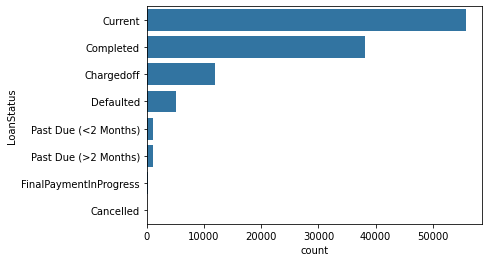

In [27]:
default_color = sb.color_palette()[0]
sb.countplot(y = df_loan.LoanStatus, color=default_color, order=df_loan.LoanStatus.value_counts().index);

It might be a better approach to focus on the **Completed**, **Chargedoff**, **Defaulted** and **Cancelled** categories, focusing on studying the loans that have a status of being done, as we don't really learn any new info from Loans that are currently ongoing.

In [28]:
df_loan.LoanStatus.value_counts()

Current                   55730
Completed                 38061
Chargedoff                11992
Defaulted                  5018
Past Due (<2 Months)       1065
Past Due (>2 Months)        992
FinalPaymentInProgress      203
Cancelled                     5
Name: LoanStatus, dtype: int64

We might as well remove the Cancelled category, because it is going to clutter our plots a little bit while contributing nothing, it shouldn't affect our numbers too much given that it forms less than 0.01% of our data.

In [29]:
loan_finished_categories = ('Completed', 'Defaulted', 'Chargedoff')
loan_finished_type = pd.api.types.CategoricalDtype(categories=loan_finished_categories)

# We're going to create a copy of the df in order to assign the new categories without affecting the original df.
df_loan_finished = df_loan.query('LoanStatus in @loan_finished_categories').loc[:, ['ListingNumber', 'LoanStatus']].copy()
df_loan_finished['LoanStatus'] = df_loan['LoanStatus'].astype(loan_finished_type)
df_loan_finished.LoanStatus.value_counts()


Completed     38061
Chargedoff    11992
Defaulted      5018
Name: LoanStatus, dtype: int64

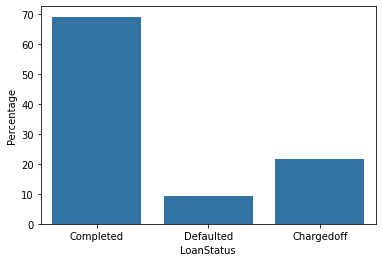

In [30]:
def plot_relative_bar_from_counts(name, counts, horizontal=False, ntotal=None, **kwargs):
    '''Plot a relative bar chart given a name (xlabel) and a value_counts
    
    If ntotal is an actual number, the percentage will be divided by that instead.
    
    The main reason of kwargs, is for added flexibility, allowing it to
    later being used with something like FacetGrid
    '''
    
    # If num is None, then it will evaluate to False, returning counts.sum(), else it returns itself:
    percentage = (counts / (ntotal or counts.sum())) * 100
    
    if horizontal:
        sb.barplot(y=counts.index, x=percentage, color=default_color);
        plt.xlabel('Percentage');
        plt.ylabel(name);
    else:
        sb.barplot(x=counts.index, y=percentage, color=default_color);
        plt.xlabel(name);
        plt.ylabel('Percentage');
    
def plot_relative_bar(cat_var, **kwargs):
    plot_relative_bar_from_counts(cat_var.name, cat_var.value_counts(), **kwargs)

plot_relative_bar(df_loan_finished.LoanStatus)

Seems that about 70% of the Loans are completed, about 20% are Chargedoff and 10% are defaulted. Let's check out the other variables.

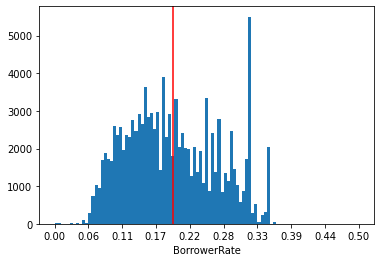

In [31]:
def gen_bins_ticks(num_var, *,
                   tick_format='{}', nbins=100, nticks=10, 
                   scale=None, datetime=False, no_ticks=False):
    '''Generate bins and ticks for a hist graph.
    
    tick_format     : Default is {} (No format)
                      Could also be {:.2f}
    nbins/nticks    : Number of bins/ticks
    
    scale           : Supported scales include:
                      'log'
    datetime        : if True, then the variable is a datetime
    no_ticks        : if True, then ticks are not modified
    
    '''
    min_ = num_var.min()
    max_ = num_var.max()
    
    func = np.linspace      
    if datetime:
        func = pd.date_range
    
    if scale is None:
        bins = func(min_, max_, nbins)
        ticks = func(min_, max_, nticks) if not no_ticks else None
    
    elif scale == 'log':
        min_, max_ = np.log10((min_, max_))
        bins = 10 ** func(min_, max_, nbins)
        ticks = 10 ** func(min_, max_, nticks) if not no_ticks else None
    
    ticks_str = [tick_format.format(t) for t in ticks] if not no_ticks else None
    return bins, (ticks, ticks_str)

def plot_hist(num_var, draw_mean_line=True, **kwargs):
    '''Plot hist for a numerical variable
    
    draw_mean_line indicates whether to draw the mean line or not
    
    kwargs will be passed to gen_bins_ticks, so you can change the
    properties of the bins/ticks.
    '''
    bins, ticks = gen_bins_ticks(num_var, **kwargs)
    plt.hist(num_var, bins);
    
    # If no_ticks wasn't given or if it was False, we supply the ticks.
    if not kwargs.get('no_ticks', 0):
        plt.xticks(*ticks);
    plt.xlabel(num_var.name);
    # Redline indicating the mean
    if draw_mean_line:
        plt.axvline(num_var.mean(), color='red');
        
plot_hist(df_loan.BorrowerRate, tick_format='{:.2f}')

Seems like the most common rates are at about 11-17%, but then there's a point at like 17% where it falls off, then the trend continues to decrease, but with some spikes, with a notably big spike at about 30%, so these could be commonly used rates for loans.

In [32]:
df_loan.BorrowerRate.value_counts().iloc[:10]

0.3177    3672
0.3500    1905
0.3199    1651
0.2900    1508
0.2699    1314
0.1500    1174
0.1400    1022
0.1099     928
0.2000     907
0.1800     791
Name: BorrowerRate, dtype: int64

So, it seems that the most common rates are 31.77% and 31.9% combinbing to form the big spike in the graph, then we have 35% and 29%. From this graph we notice that there are some large rates that are very commonly used, but there is a variety in the commonly used small rates.

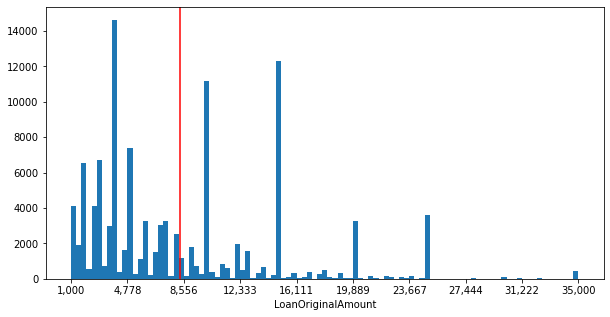

In [33]:
plt.figure(figsize=[10, 5])
plot_hist(df_loan.LoanOriginalAmount, tick_format = '{:,.0f}')

There seems to be some noticeable skew in the data, let's try a logarithmic scale

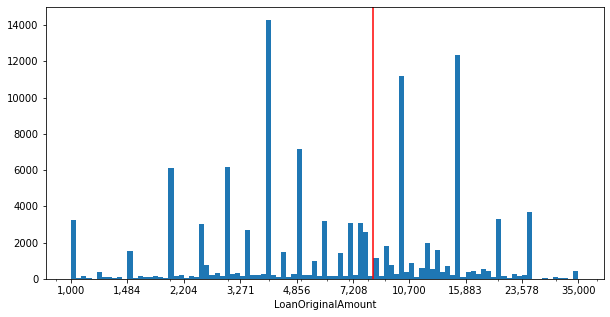

In [34]:
plt.figure(figsize=[10, 5])
plt.xscale('log')
plot_hist(df_loan.LoanOriginalAmount, tick_format = '{:,.0f}', 
          scale='log')

In [35]:
df_loan.LoanOriginalAmount.value_counts().iloc[:5]

4000     14207
15000    12232
10000    10956
5000      6953
2000      6042
Name: LoanOriginalAmount, dtype: int64

It looks that there are some common initial loan prices, Probably default options used in the site, or industrial standards.

Also, the initial graph shows that it follows a logarithmic scale that drops massively after 15,000.

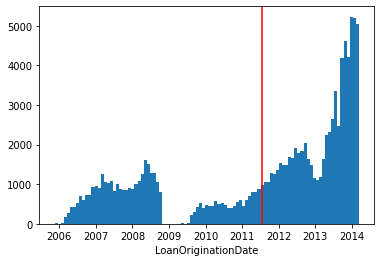

In [36]:
plot_hist(df_loan.LoanOriginationDate, datetime=True, no_ticks=True)

It seems that there is a positive correlation between number of loans and time, dropping at some period in 2009, so it could be due to *Prosper* running into some difficulties or due to an update. Then, there was another smaller drop around 2013, and from then there is a big jump in the number of loans.

In [37]:
df_loan.Term.value_counts()

36    87224
60    24228
12     1614
Name: Term, dtype: int64

Here we notice that Term should've been a categorical variable, due to its small range of values. We'll fix that and plot it.

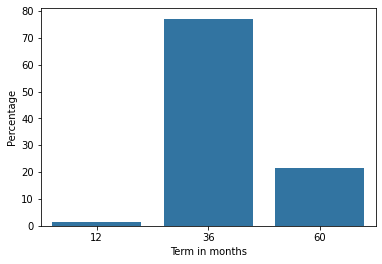

In [38]:
df_term_categories = [12, 36, 60]
df_term_type = pd.api.types.CategoricalDtype(df_term_categories, ordered=True)
df_loan.loc[:,'Term'] = df_loan.loc[:,'Term'].astype(df_term_type)

#sb.countplot(data=df_loan, x='Term', color=default_color);
plot_relative_bar(df_loan.Term)
plt.xlabel('Term in months');

So, 36-month terms are most popular by far, about 77%, 60-month terms take up about 20% and 12-month terms take like 1% - 2%.

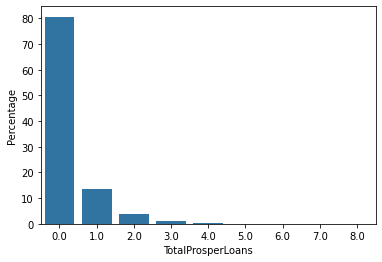

In [39]:
plot_relative_bar(df_prosperLoans.TotalProsperLoans)

The vast majority (80%) of loans were made with 0-prior loans, and it makes sense for it to be a large number, in fact, this always has to be the largest, because a 1-prior loan implies that another loan was made with 0-prior loans.

We could create a feature that shows the total number of loans that each borrower made, by subtracting the larger values from the smaller ones:

In [40]:
counts = df_prosperLoans.TotalProsperLoans.value_counts()
totalBorrowerLoans = [counts.iloc[i] - counts.iloc[i+1] for i in range(0, 8)]
totalBorrowerLoans.append(counts[8])
print(counts.to_list())
print(totalBorrowerLoans)
totalBorrowerLoans = pd.Series(totalBorrowerLoans, index=(i for i in range(1, 10)))

[91144, 15433, 4502, 1433, 413, 103, 29, 8, 1]
[75711, 10931, 3069, 1020, 310, 74, 21, 7, 1]


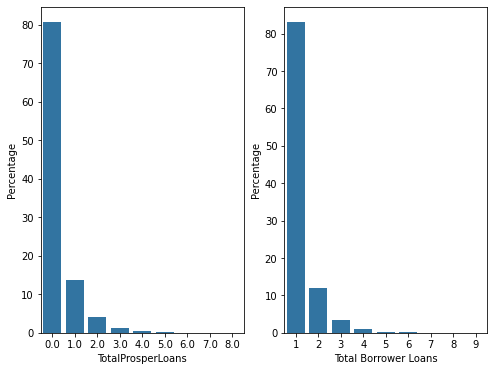

In [41]:
plt.figure(figsize=[8, 6])
plt.subplot(1, 2, 1)
plot_relative_bar(df_prosperLoans.TotalProsperLoans)

plt.subplot(1, 2, 2)
plot_relative_bar_from_counts('Total Borrower Loans', totalBorrowerLoans)

It seems that more than 82% of borrowers have made only one loan, about 10% have made 2 loans in total, let's zoom in a little bit.

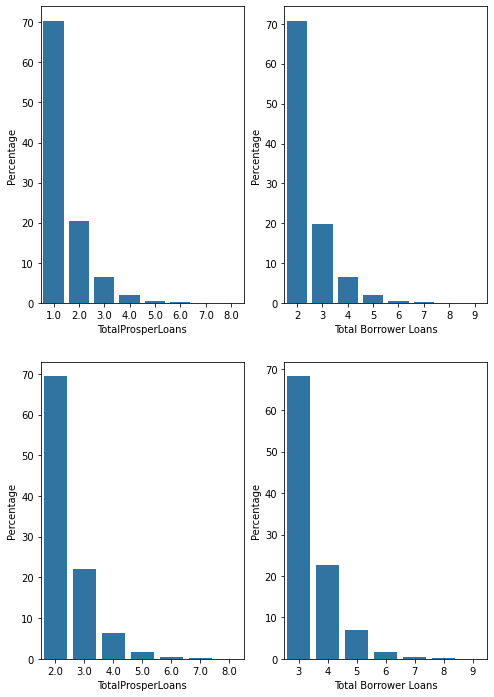

In [42]:
plt.figure(figsize=[8, 12])
plt.subplot(2, 2, 1)
plot_relative_bar_from_counts('TotalProsperLoans', df_prosperLoans.TotalProsperLoans.value_counts().iloc[1:])
plt.subplot(2, 2, 2)
plot_relative_bar_from_counts('Total Borrower Loans', totalBorrowerLoans.iloc[1:])
plt.subplot(2, 2, 3)
plot_relative_bar_from_counts('TotalProsperLoans', df_prosperLoans.TotalProsperLoans.value_counts().iloc[2:])
plt.subplot(2, 2, 4)
plot_relative_bar_from_counts('Total Borrower Loans', totalBorrowerLoans.iloc[2:])

This is fascinating, First of all we notice that as we zoom in, that the graphs are logarithmic is nature, as each graph is quite similar to its zoomed-out version. 

Second, there isn't really a big difference in the shape of the graph between:
<ul>
    <li>Counting the prior loans for each loan (TotalProsperLoans)</li>
    <li>Counting the total number of loans that each borrower made</li>
</ul>
This could be as a consequence of the logarithmic nature of the graph. Anyway, from this we understand that due to the nature of loans, the vast majority of borrowers only take 1 loan, while less numbers take 2 and 3, etc.. 

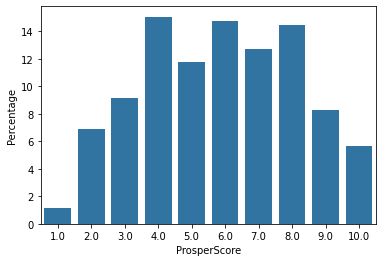

In [43]:
plot_relative_bar(df_prosperScore.ProsperScore)

Most loans have a prosper score somewhere in the middle, with spikes in 4/6/8. Seems normally distributed.

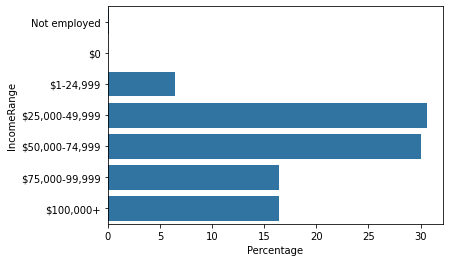

In [44]:
plot_relative_bar(df_income.IncomeRange, horizontal=True)

It does seem that most borrowers tend to have high income, with a very small portions whose income is less than $25,000.

Next up, we want to plot some categorical variables that tend to have a lot of categories, so we'll resort to plotting the most common 5 categories and the least common 5 categories.

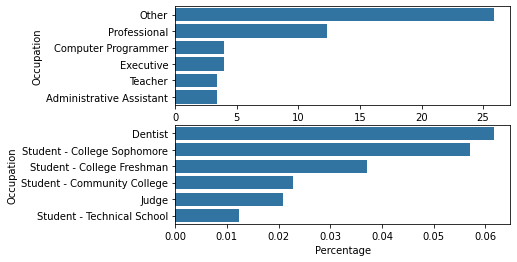

In [45]:
def plot_relative_many_categories(cat_val, n=5, which=0, **kwargs):
    '''
    which: can take 3 values
    - If 1, then only plot top n categories
    - If -1, then only plot bottom n categories
    - If 0 (Default), plot both of them using subplot
    
    - You want to use either 1 or -1 for use with FacetGrid
    '''
    # Once again, kwargs is for compatibility with other functions
    ntotal = cat_val.count()
    counts = cat_val.value_counts()
    counts.index = counts.index.astype('str') # Important so that the plot doesn't plot all the categories
    
    large_counts = counts.iloc[:n]
    small_counts = counts.iloc[-n:]
    
    if(not which):
        plt.subplot(2, 1, 1)
        plot_relative_bar_from_counts(cat_val.name, large_counts, horizontal=True, ntotal=ntotal)
        plt.subplot(2, 1, 2)
        plot_relative_bar_from_counts(cat_val.name, small_counts, horizontal=True, ntotal=ntotal)
    elif(which == 1):
        plot_relative_bar_from_counts(cat_val.name, large_counts, horizontal=True, ntotal=ntotal)
    elif(which == -1):
        plot_relative_bar_from_counts(cat_val.name, small_counts, horizontal=True, ntotal=ntotal)

plot_relative_many_categories(df_misc.Occupation, n=6)


So, college students, dentists and judges tend to take loans the least, while teachers, executives, programmers and professionals tend to take loans the most. Interesting data.

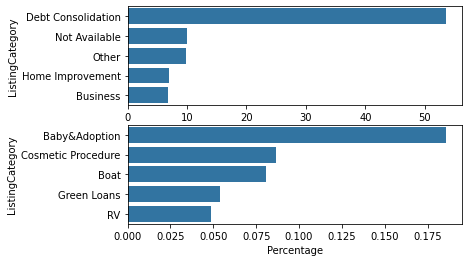

In [46]:
plot_relative_many_categories(df_misc.ListingCategory, n = 5)

Over 50% of the loans were for debt conslidations, after that follows home improvement and business. 

The least loans were for RV, green loands, boat and cosmetic procedure.

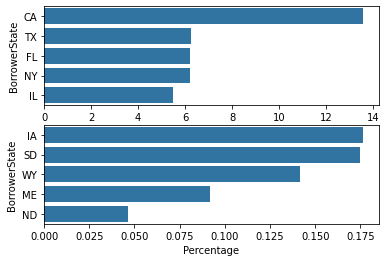

In [47]:
plot_relative_many_categories(df_misc.BorrowerState)

The states that had the most loans was CA, TX and later followed by FL and NY.

As for the least loans, we had ND at the bottom followed by ME and WY.

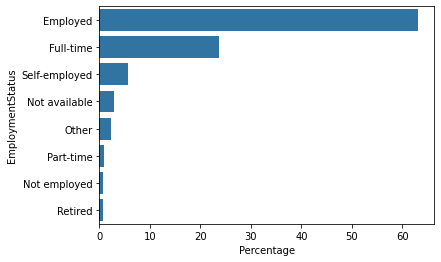

In [48]:
plot_relative_bar(df_misc.EmploymentStatus, horizontal=True)

Over 80% of loans were made by employed and full-time, Retired and non-employed people contributed to the least loans.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I had to do a log transformation for **LoanOriginalAmount**. I'd say it was a bit unusual having ~31% being the most common Borrower's Rate as it feels quite high. 

### Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I thought I had taken care of everything in the data cleaning phase, but then I realized that I had to drop the Loans that are currently ongoing because it would just be in the way. So, I had to tidy that up.

<a id="bivariate"> </a> 
### Bivariate Exploration

Having looked at all the variables from a univariate standpoint, we shall proceed to do some Bivariate exploration here, the key variables is <b>LoanStatus</b>
We're going to study the influence of the rest of variables on it.

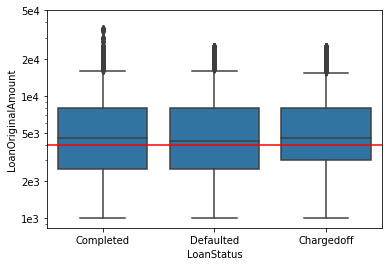

In [49]:
# First, we're going to compare LoanStatus with the rest of df_loan
# So, we'll have to join both datasets together.
df_loan_finished_loan = df_loan.drop('LoanStatus', axis=1).merge(df_loan_finished, on='ListingNumber')
sb.boxplot(data=df_loan_finished_loan, x='LoanStatus', y='LoanOriginalAmount', color=default_color);
yticks = [1000, 2000, 5000, 10000, 20000, 50000], ['1e3', '2e3', '5e3', '1e4', '2e4', '5e4']
plt.yscale('log')
plt.yticks(*yticks);
plt.axhline(4000, color='red');

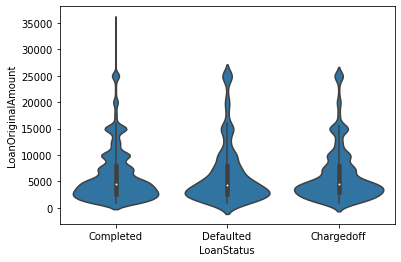

In [50]:
sb.violinplot(data=df_loan_finished_loan, x='LoanStatus', y='LoanOriginalAmount', color=default_color);

There doesn't seem to be an apparent correlation between the LoanStatus and LoanOriginalAmount, although it is interesting to see that only completed loans tend to raise higher than 25,000. And most of Chargedoff/Defaulted loans are concentrated at the bottom, but this could have been due to most loans being 4,000.

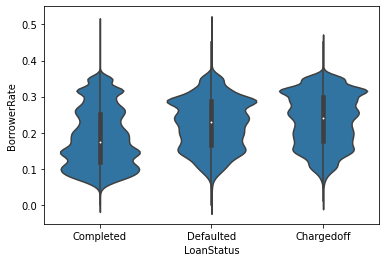

In [51]:
sb.violinplot(data=df_loan_finished_loan, x='LoanStatus', y='BorrowerRate', color=default_color);

This one is an obvious correlation, Chargedoff/Defaulted loans tend to occur more often with higher BorrowerRates, and very low at rates around 0.1, which is mostly where completed loans are. Although, one should also keep in mind there are more completed loans than defaulted/chargedoff, so this doesn't tell the whole story.

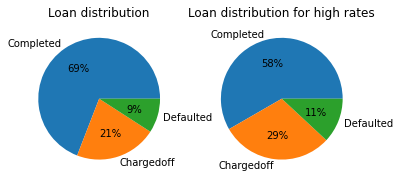

In [52]:
high_rate = df_loan_finished_loan.query('BorrowerRate > 0.2 & BorrowerRate < 0.35').LoanStatus
high_rate_counts = high_rate.value_counts()
all_rate_counts = df_loan_finished.LoanStatus.value_counts()

plt.subplot(1, 2, 1)
plt.pie(all_rate_counts, labels=all_rate_counts.index, autopct = '%d%%');
plt.title('Loan distribution');
plt.subplot(1, 2, 2)
plt.pie(high_rate_counts, labels=high_rate_counts.index, autopct = '%d%%');
plt.title('Loan distribution for high rates');

So, Loan rates between 0.2 and 0.35 have 40% chance to be chargedoff or defaulted.

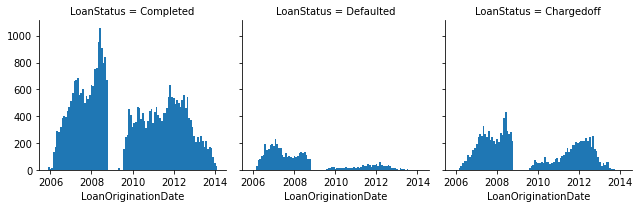

In [53]:
bins, _ = gen_bins_ticks(df_loan_finished_loan.LoanOriginationDate, datetime=True, no_ticks=True)

g = sb.FacetGrid(df_loan_finished_loan, col='LoanStatus')
g.map(plt.hist, 'LoanOriginationDate', bins=bins);
plt.xticks(['2006', '2008', '2010', '2012', '2014'], ['2006', '2008', '2010', '2012', '2014']);

The main reason all the graphs drop down at the end, is because we're only accounting for finished loans, so most of 2014 Loans are marked as "current".

Completed Loans seem to follow a somewhat similar distribution to the default for LoanOriginationDate that we've seen before, except with the drop down at the end.

Defaulted Loans seem to decrease as time goes by. 

Chargedoff Loans seem to follow the same trend as completed loans, with a relatively bigger spike in 2012. 

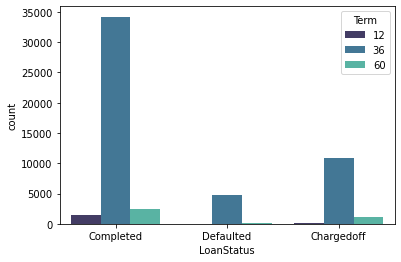

In [54]:
sb.countplot(data=df_loan_finished_loan, x='LoanStatus', hue='Term', palette='mako');

LoanStatus distribution seems to be pretty similar among the 3 different terms.

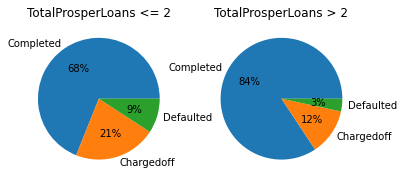

In [55]:
df_loan_finished_prosperLoans = df_loan_finished_loan.merge(df_prosperLoans)
high_prosperLoans_counts = df_loan_finished_prosperLoans.query('TotalProsperLoans > 2').LoanStatus.value_counts()
low_prosperLoans_counts = df_loan_finished_prosperLoans.query('TotalProsperLoans <= 2').LoanStatus.value_counts()


plt.subplot(1, 2, 1)
plt.pie(low_prosperLoans_counts, labels=low_prosperLoans_counts.index, autopct='%d%%');
plt.title('TotalProsperLoans <= 2');
plt.subplot(1, 2, 2)
plt.pie(high_prosperLoans_counts, labels=high_prosperLoans_counts.index, autopct='%d%%');
plt.title('TotalProsperLoans > 2');

It does seem to be that the higher TotalProsperLoans, the higher the likelihood of a loan being succesfully completed, which makes sense.

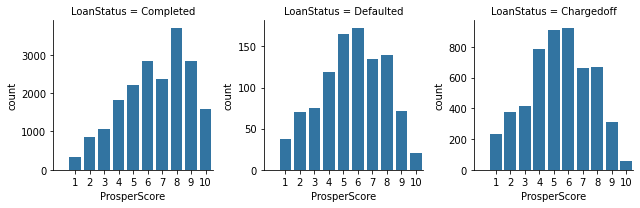

In [56]:
df_loan_finished_prosperScore = df_loan_finished.merge(df_prosperScore)

g = sb.FacetGrid(df_loan_finished_prosperScore, col='LoanStatus', sharey=False)
g.map(sb.countplot, 'ProsperScore', order=range(0, 11));
plt.xticks(range(1, 11), (str(x) for x in range(1, 11)));

For CompletedLoans there does seem to be a positive correlation, that falls down after 8, but from our ProsperScore univariate plot, that's because there are less Borrowers with ProsperScore higher than 8. 

ChargedOff and DefaultLoans seem to be mostly concentrated at the middle region, following somewhat of a normal distribution. They definitely take a big drop at ProsperScores 9-10 though.

Text(446.5583333333333, 0.5, 'IncomeRange')

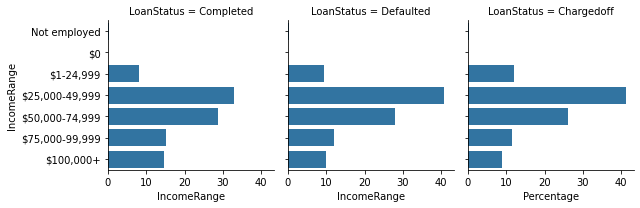

In [57]:
df_loan_finished_income = df_loan_finished.merge(df_income)

g = sb.FacetGrid(df_loan_finished_income, col='LoanStatus')
g.map(plot_relative_bar, 'IncomeRange', horizontal=True);
plt.xlabel('Percentage');
plt.ylabel('IncomeRange')

Completed loans tend to be more common with higher income ranges, and lower with lower income.

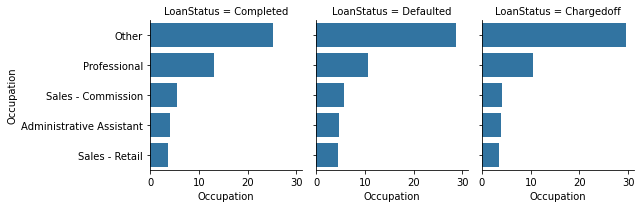

In [58]:
df_loan_finished_misc = df_loan_finished.merge(df_misc)

g = sb.FacetGrid(df_loan_finished_misc, col='LoanStatus')
g.map(plot_relative_many_categories, 'Occupation', horizontal=True, which=1);
plt.ylabel('Percentage');

People listing **Other** as their job tend to have higher chance to get a Defaulted/Chargedoff loan, while **Professionals** tend to have higher chance to complete their loans.

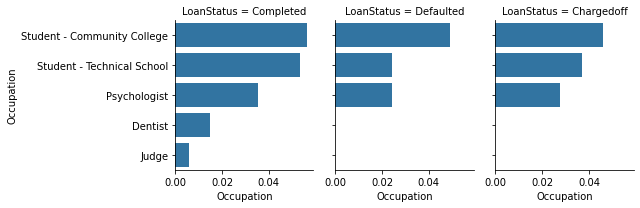

In [59]:
g = sb.FacetGrid(df_loan_finished_misc, col='LoanStatus')
g.map(plot_relative_many_categories, 'Occupation', horizontal=True, which=-1);
plt.ylabel('Percentage');

And all Dentists/Judge loans have been succesfully completed, although, it is a tiny sample size.

Text(446.5583333333333, 0.5, 'Percentage')

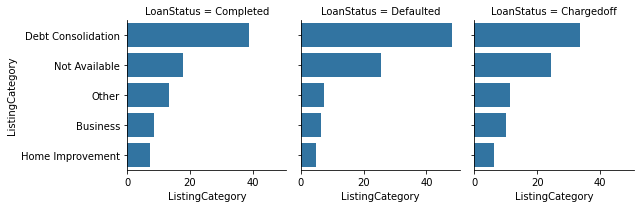

In [60]:
g = sb.FacetGrid(df_loan_finished_misc, col='LoanStatus')
g.map(plot_relative_many_categories, 'ListingCategory', horizontal=True, which=1);
plt.ylabel('Percentage')

Once again, the vague answer (Not Available) leads to more Defaults/Chargeoffs. Although in this case, The **Other** category isn't as high. Also interesting how **Debt Consolidation** forms a very high percentage of Defaulted loans, compared to the other types.

Text(446.5583333333333, 0.5, 'Percentage')

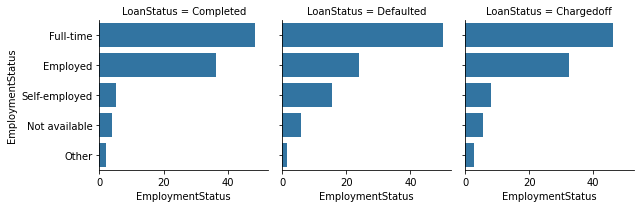

In [61]:
g = sb.FacetGrid(df_loan_finished_misc, col='LoanStatus')
g.map(plot_relative_many_categories, 'EmploymentStatus', horizontal=True, which=1);
plt.ylabel('Percentage')

**Self-employed** is another category to watch out for here, with a very low percentage of completed loans. Vica versa with **Employed**.

Last but not least, we're going to take a look at plots of:
<ul>
    <li>BorrowerRate</li>
    <li>LoanOriginalAmount</li>
    <li>ProsperScore</li>
</ul>

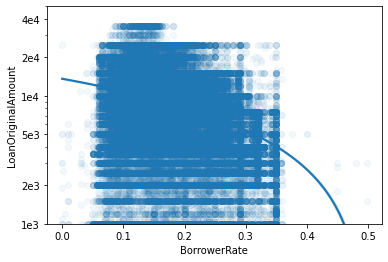

In [62]:
sb.regplot(data=df_loan, x='BorrowerRate', y='LoanOriginalAmount', scatter_kws = {'alpha':0.05});
yticks = [1000, 2000, 5000, 10000, 20000, 40000], ['1e3', '2e3', '5e3', '1e4', '2e4', '4e4']
plt.yscale('log')
plt.yticks(*yticks);
plt.ylim((1000, 50000));

Negative correlation, so the higher the Borrower's rate, the lower the loan's original amount, and vice versa.

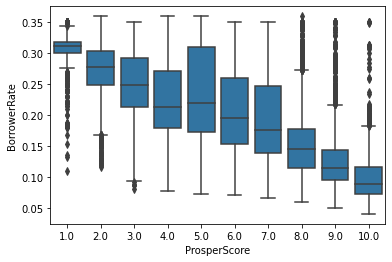

In [63]:
df_loan_prosperScore = df_loan.merge(df_prosperScore)
sb.boxplot(data=df_loan_prosperScore, x='ProsperScore', y='BorrowerRate', color=default_color);

Beautiful, what a nice and clear negative correlation.

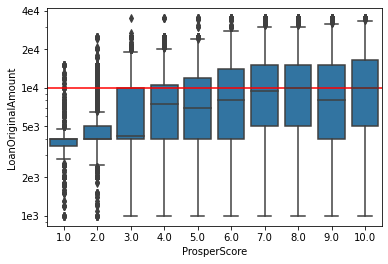

In [64]:
sb.boxplot(data=df_loan_prosperScore, x='ProsperScore', y='LoanOriginalAmount', color=default_color);
yticks = [1000, 2000, 5000, 10000, 20000, 40000], ['1e3', '2e3', '5e3', '1e4', '2e4', '4e4']
plt.yscale('log')
plt.yticks(*yticks);
plt.axhline(10000, color='red');

There seems to be somewhat of a positive correlation, but mostly apparent at the jump between 3 and 4 prosperScore. It kinda makes sense, because LoanOriginalAmount and BorrowerRate are inversely proportional, and same goes for ProsperScore and BorrowerRate, so it stands to reason that there is a positive correlation between ProsperScore and LoanOriginalAmount.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The effect on other variables on **LoanStatus**:
<ul>
    <li><b>LoanOriginalAmount</b>: No apparent correlation, but only completed loans raise higher than 25k.</li>
    <li><b>BorrowerRate</b>: Completed loans tend to have lower borrower rates.</li>
    <li><b>LoanOriginationDate</b>:Defaulted Loans seem to decrease by time.</li>
    <li><b>Term</b>:Doesn't seem to be a correlation.</li>
    <li><b>TotalProsperLoans</b>:The higher, the more chance of a completed loan.</li>
    <li><b>ProsperScore</b>: Positive correlation with completed loans, especially apparent at scores 8+ </li>
    <li><b>IncomeRange</b>: Positive correlation with completed loans.</li>
    <li><b>Occupation</b>:Professionals lead to more completed loans, vice versa with an occupation of <i>Other</i></li>
    <li><b>ListingCategory</b>:Debt Consolidation seem to have a very high percentage of defaulted loans.</li>
    <li><b>EmploymentStatus</b>:Self-employed leads to a small percentage of completed loans, and a higher chance of defaulted/chargedoff</li>
</ul>

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There was a negative correlation between BorrowerRate and LoanOriginalAmount, and a very clear negative correlation between BorrowerRate and ProsperScore. Also a positive correlation betwene ProsperScore and LoanOriginalAmount, but that could be due to the effect of the third variable.

<a id="multivariate"> </a> 
### Multivariate Exploration

For our Multivariate exploration, we shall take another look at the following variables and check if our findings confirm our previous conclusions:
<ul>
    <li><b>LoanStatus</b></li>
    <li><b>ProsperScore</b></li>
    <li><b>LoanOriginalAmount</b></li>
    <li><b>BorrowerRate</b></li>
</ul>

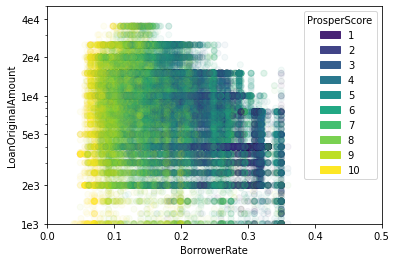

In [65]:
scatter = plt.scatter(data=df_loan_prosperScore, x='BorrowerRate', y='LoanOriginalAmount', alpha=0.05,
        c='ProsperScore', cmap='viridis');
yticks = [1000, 2000, 5000, 10000, 20000, 40000], ['1e3', '2e3', '5e3', '1e4', '2e4', '4e4']
plt.yscale('log')
plt.yticks(*yticks);
plt.ylim((1000, 50000));

plt.xlabel('BorrowerRate')
plt.ylabel('LoanOriginalAmount');
plt.xlim(0, 0.5) # in order for our legend to fit without cluttering the plot
from matplotlib.patches import Circle
custom_lines = [Circle((0, 0), color=scatter.cmap(x)) for x in np.arange(0.1, 1.1, 0.1)]

plt.legend(custom_lines, (str(x) for x in range(1, 11)), title='ProsperScore');

So, we're using the same scatterplot we've used previously, but this time with prosperScore as a third variable, we can see that prosperScore correlates negatively with BorrowerRate, it also appears to correlates positively with LoanOriginalAmount, although it isn't as clear as with BorrowerRate.

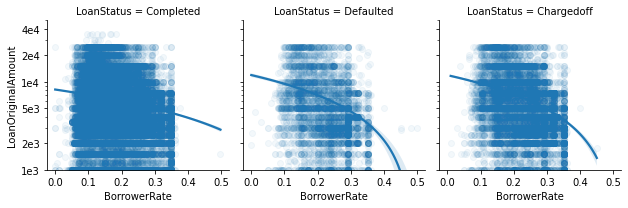

In [66]:
g = sb.FacetGrid(df_loan_finished_loan, col='LoanStatus')
g.map(sb.regplot, 'BorrowerRate', 'LoanOriginalAmount', scatter_kws={'alpha':0.05})


yticks = [1000, 2000, 5000, 10000, 20000, 40000], ['1e3', '2e3', '5e3', '1e4', '2e4', '4e4']
plt.yscale('log')
plt.yticks(*yticks);
plt.ylim((1000, 50000));

Ok, this might be a lot to take in, so let's take a step back and remember our past observations:
<ul>
    <li>LoanStatus vs LoanOriginalAmount --> No apparent correlation But only completed loans raise above 25,000.</li>
    <li>LoanStatus vs BorrowerRate --> Low BorrowerRate for completed loans and vice versa.</li>
    <li>LoanOriginalAmount vs BorrowerRate --> Negative corelation.
</ul>

These observations should be confirmed here, and also another thing to notice is that the negative correlation between BorrowerRate and LoanOriginalAmount is influenced by the LoanStatus, where it decreases slower with Completed than with Chargedoff/Defaulted.

In my opinion, it makes some sense, because the higher the initial loan is, it is possible that you'd be investing in something more important, or more likely to give you a profit. Thus increasing the chances of paying back the loan, given a constant BorrowerRate. And this is kinda shown by the data, but it could also be due to a smaller sample size for the Defaulted/Chargedoff.

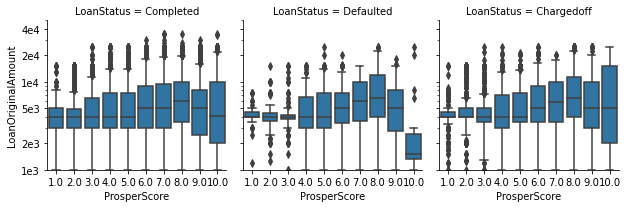

In [67]:
df_loan_finished_loan_prosperScore = df_loan_finished_loan.merge(df_prosperScore)
g = sb.FacetGrid(df_loan_finished_loan_prosperScore, col='LoanStatus')
g.map(sb.boxplot, 'ProsperScore', 'LoanOriginalAmount')


yticks = [1000, 2000, 5000, 10000, 20000, 40000], ['1e3', '2e3', '5e3', '1e4', '2e4', '4e4']
plt.yscale('log')
plt.yticks(*yticks);
plt.ylim((1000, 50000));

Remember, that ProsperScore is somewhat positively correlated with LoanOriginalAmount and clearly negatively correlated with BorrowerRate. As for, LoanStatus, it is positively correlated with Completed Loans, and looks normally distributed for Defaulted/Chargedoff loans.

Here, we can see, a clearer positive correlation with LoanOriginalAmount, although we do notice it drops off after a ProsperScore of 8, however that could easily be due to the size of data involved, which drops off after 8.



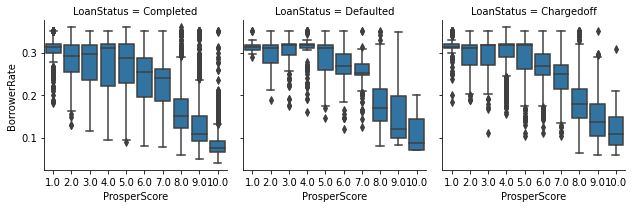

In [68]:
df_loan_finished_loan_prosperScore = df_loan_finished_loan.merge(df_prosperScore)
g = sb.FacetGrid(df_loan_finished_loan_prosperScore, col='LoanStatus')
g.map(sb.boxplot, 'ProsperScore', 'BorrowerRate');


The plots here look very similar to the BorowerRate vs ProsperScore plot. Some of the Defaulted/Chargedoff loans seem to take on tightly-packed boxes meaning that they are mostly constrained within a certain range.


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?¶

It was interesting to see that the negative correlation between BorrowerRate and LoanOriginalAmount seems to be influenced by the LoanStatus.

The multivariate plot also reinforced the positive relatitonship between LoanOriginalAmount and ProsperScore. 


<a href="#top">Back to top</a>